## Results of Host Prediction
### Dataset: EMBL mapping, Vertebrates, Non-IDV

**Models**: VirProBERT

**Positional Embedding**: Sin-Cos

**Maximum Sequence Length**: 1036

**Classification**: Multi-class

**\# classes**: 4

**\# train samples** = 

**\# validation samples** = 

**\# test samples** = 

In [1]:
import seaborn

In [2]:
seaborn.__version__

'0.11.2'

In [4]:
import sys
import os
from pathlib import Path
os.chdir("/home/sipek/zoonosis")
# sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
# sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
# sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
# sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path

['/home/sipek/.conda/envs/virprobert/lib/python311.zip',
 '/home/sipek/.conda/envs/virprobert/lib/python3.11',
 '/home/sipek/.conda/envs/virprobert/lib/python3.11/lib-dynload',
 '',
 '/home/sipek/.conda/envs/virprobert/lib/python3.11/site-packages']

In [5]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from src.utils import utils, evaluation_utils, visualization_utils

In [6]:
itr_col = "itr"
experiment_col = "experiment"
y_true_col = "y_true"

def class_wise_auprc_analysis(output_filepaths, classes, figure_output_filepath):
    auprc_results = []
    all_classes = classes
    for model, output_filepath in output_filepaths.items():
        df = pd.read_csv(output_filepath, index_col=0)
        print(f"Read output {model} = {df.shape}")
        
        cols = df.columns
        classes = list(set(cols) - set([itr_col, experiment_col, y_true_col]))
        itrs = df[itr_col].unique()
    
        for itr in itrs:
            df_itr = df[df[itr_col] == itr]
            _, auprcs_df = evaluation_utils.compute_class_auprc(df_itr, y_pred_columns=classes, y_true_col=y_true_col)
            auprcs_df["model"] = model
            auprcs_df["itr"] = itr
            auprc_results.append(auprcs_df)
    metadata = utils.compute_class_distribution(df_itr, y_true_col, format=False)
    metadata_formatted = utils.compute_class_distribution(df_itr, y_true_col, format=True)
    metadata_sorted = {}
    for k, v in metadata.items():
        metadata_sorted[metadata_formatted[k]] = v
    for cls in all_classes:
        if not any(cls in key for key in metadata_sorted.keys()):
            metadata_sorted[cls] = []
    auprc_results_df = pd.concat(auprc_results, ignore_index=True)
    auprc_results_df.replace({"class":metadata_formatted}, inplace=True)
    
    FIGURE_CONFIG = {
        "figsize": (16, 10),
        "xtick.labelsize": 20,
        "ytick.labelsize": 20    
    }

    visualization_utils.pre_plot_config(FIGURE_CONFIG)
    ax = sns.boxplot(data=auprc_results_df, x="class", y="auprc", hue="model", 
                     order=metadata_sorted, linewidth=2.5, fliersize=5,
                     palette="colorblind")
    plt.draw()
    
    ax.set_ylim(0, 1)
    ax.set_ylabel("AUPRC", size=22)
    ax.set_xlabel("", size=22, labelpad=2)
    sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False)
    plt.setp(ax.get_legend().get_texts(), fontsize=20)
    visualization_utils.wrap_ticklabels(ax, axis="x")
    visualization_utils.view(figure_output_filepath)
    print(figure_output_filepath)
    plt.show()
    return auprc_results_df

In [11]:
output_filepaths = {
    "LR": os.path.join(os.getcwd(), "output/raw/baseline-project/uniref90_embl_vertebrates_non_idv_t0.01_c5_seq_len_in_99.9percentile/202504/host_multi/token_virus_host_name_multi__lr_output.csv"),
    "RF": os.path.join(os.getcwd(), "output/raw/baseline-project/uniref90_embl_vertebrates_non_idv_t0.01_c5_seq_len_in_99.9percentile/202504/host_multi/token_virus_host_name_multi__rf_output.csv"),
    "SVM": os.path.join(os.getcwd(), "output/raw/baseline-project/uniref90_embl_vertebrates_non_idv_t0.01_c5_seq_len_in_99.9percentile/202504/host_multi/token_virus_host_name_multi__svm_output.csv"),
    "XGBoost": os.path.join(os.getcwd(), "output/raw/baseline-project/uniref90_embl_vertebrates_non_idv_t0.01_c5_seq_len_in_99.9percentile/202504/host_multi/token_virus_host_name_multi__xgb_output.csv"),
    "VirProBert": os.path.join(os.getcwd(), "output/raw/baseline-project/uniref90_embl_vertebrates_non_idv_t0.01_c5_seq_len_in_99.9percentile/original-output-blessy/mlm_tfenc_l6_h8_lr1e-4_uniref90viridae_msl256s64allemb_vs30cls_batchnorm_hybrid_attention_msl256s64ae_fnn_2l_d1024_lr1e-4_output.csv")
}
classes = ["Human","Pig","Capybara","Himalayan marmot", "Red junglefowl"]

Read output LR = (31690, 7)
Read output RF = (31690, 7)
Read output SVM = (31690, 7)
Read output XGBoost = (31690, 7)
Read output VirProBert = (15845, 7)
/home/sipek/zoonosis/output/visualization/uniref90/baseline-project/host_multi_weights_classwise_aurpc_boxplot.pdf


/home/sipek/zoonosis/src/utils/visualization_utils.py:101: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(output_file_path)
/home/sipek/zoonosis/src/utils/visualization_utils.py:101: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(output_file_path)
/home/sipek/zoonosis/src/utils/visualization_utils.py:101: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(output_file_path)


<Figure size 640x480 with 0 Axes>

/home/sipek/.conda/envs/virprobert/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/sipek/.conda/envs/virprobert/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/sipek/.conda/envs/virprobert/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/sipek/.conda/envs/virprobert/lib/python3.11/site-packages/IPython

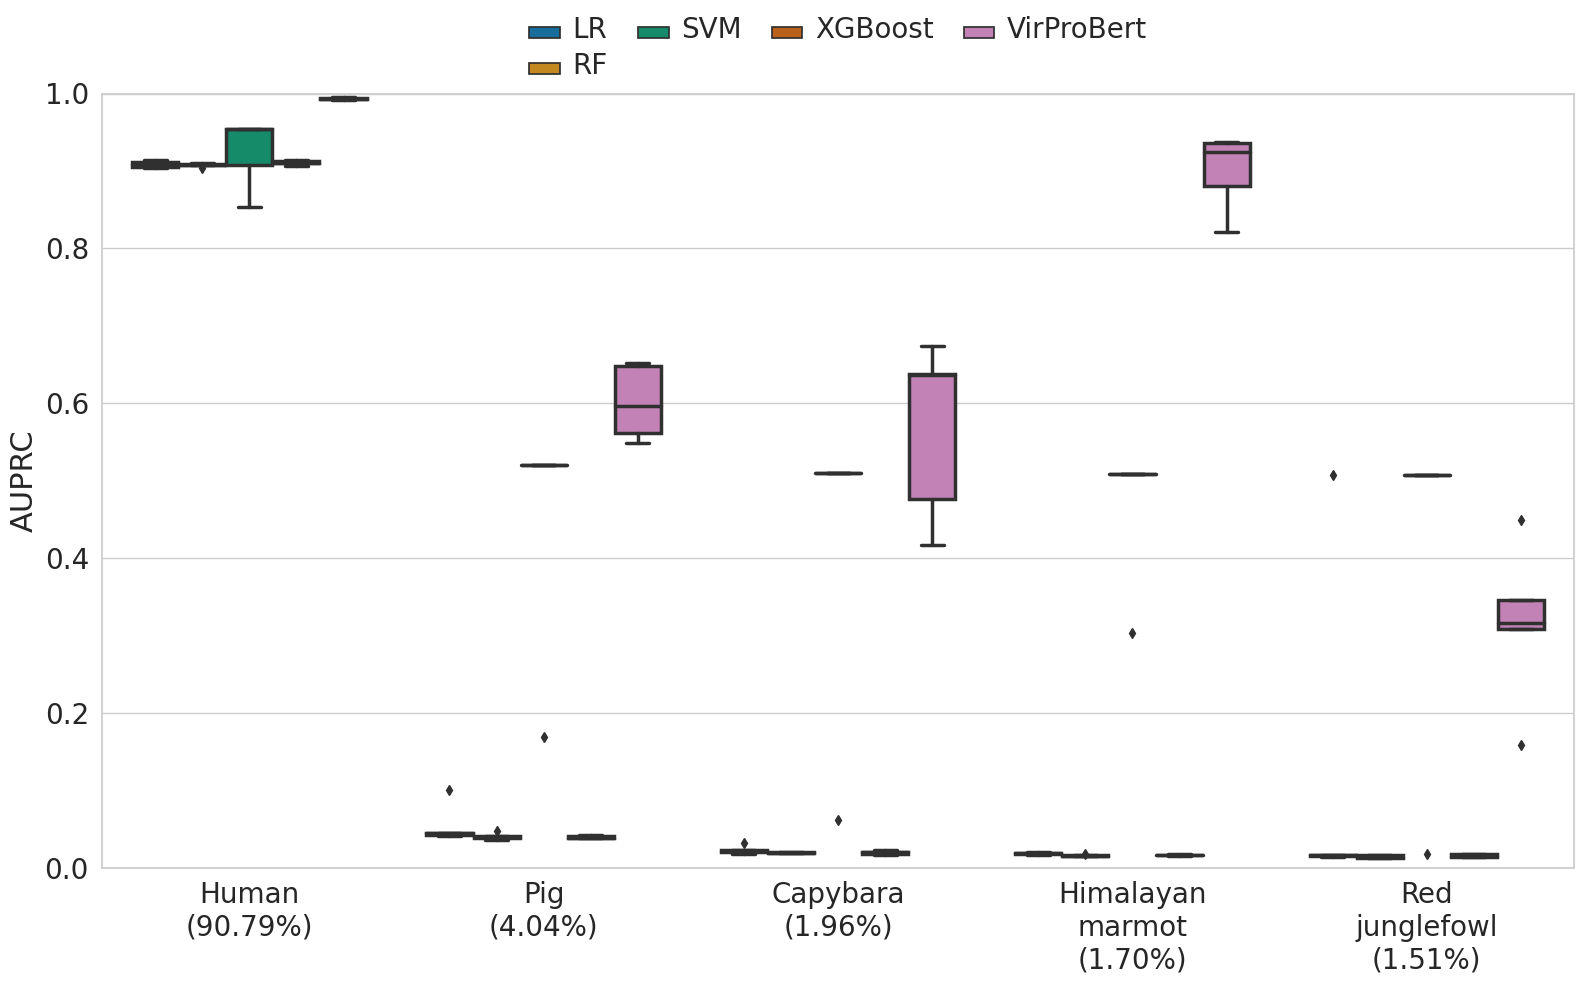

In [12]:
# figure_output_filepath = os.path.join(os.getcwd(), "..","..", "..", "..", "output/visualization/auprc_plots/0225/host_multi_all_models_classwise_aurpc_boxplot.pdf")
figure_output_filepath = os.path.join(os.getcwd(), "output/visualization/uniref90/baseline-project/host_multi_weights_classwise_aurpc_boxplot.pdf")
Path(os.path.dirname(figure_output_filepath)).mkdir(parents=True, exist_ok=True)
auprc_results_df = class_wise_auprc_analysis(output_filepaths, classes, figure_output_filepath)

In [13]:
auprc_results_df[["model", "class", "auprc"]].groupby(["model", "class"]).mean("auprc")

auprc
model      class                             
LR         Capybara (1.96%)          0.023577
           Himalayan marmot (1.70%)  0.018582
           Human (90.79%)            0.908666
           Pig (4.04%)               0.054803
           Red junglefowl (1.51%)    0.114277
RF         Capybara (1.96%)          0.019904
           Himalayan marmot (1.70%)  0.016667
           Human (90.79%)            0.907601
           Pig (4.04%)               0.040446
           Red junglefowl (1.51%)    0.014568
SVM        Capybara (1.96%)          0.420261
           Himalayan marmot (1.70%)  0.467525
           Human (90.79%)            0.924620
           Pig (4.04%)               0.449865
           Red junglefowl (1.51%)    0.409640
VirProBert Capybara (1.96%)          0.568408
           Himalayan marmot (1.70%)  0.899886
           Human (90.79%)            0.993320
           Pig (4.04%)               0.601161
           Red junglefowl (1.51%)    0.315789
XGBoost    Capybara (1.96%)          0.019822
           Himalayan marmot (1.70%)  0.016719
           Human (90.79%)            0.910725
           Pig (4.04%)               0.039968
           Red junglefowl (1.51%)    0.016092